# **Part 2 - Can we omit some controls?**


Graph the DAG that represents the following causal effects:

*   $X$ → $Y$  
*   $Z_1$ → $X$, $Z_1$ → $Y$
*   $Z_2$ → $X$, $Z_2$ → $Y$
*   $Z_3$ → $Z_2$, $Z_3$ → $Y$

Assume that every causal arrow represents a true effect of one and simulate the data (just like in the lab).  
So for example $Z_1$ → $X$ means that $Z_1$ = $ε$<sub>$Z$<sub>$1$</sub></sub> and $X$ = $Z_1$ $+$ $ε_X$

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sms

***DAG***

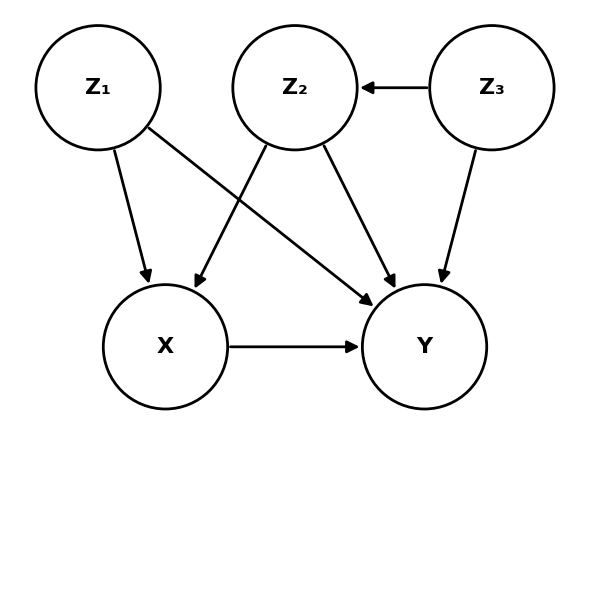

In [22]:
plt.rcParams["figure.facecolor"] = "white"

def unit_vec(p, q):
    v = np.array(q) - np.array(p)
    n = np.linalg.norm(v)
    return v / n if n > 0 else v

def shrink_segment(p, q, r):
    p = np.array(p)
    q = np.array(q)
    u = unit_vec(p, q)
    return (p + r*u, q - r*u)

def draw_node(ax, xy, r=0.12, label="", lw=2):
    c = Circle(xy, r, facecolor="white", edgecolor="black", linewidth=lw)
    ax.add_patch(c)
    ax.text(xy[0], xy[1], label, ha="center", va="center", fontsize=16, fontweight="bold")

def draw_arrow(ax, p, q, r=0.12, lw=2):
    p2, q2 = shrink_segment(p, q, r)
    arr = FancyArrowPatch(
        p2, q2,
        arrowstyle="-|>", mutation_scale=18,
        linewidth=lw, color="black",
        connectionstyle="arc3,rad=0.0",
        zorder=3,
    )
    ax.add_patch(arr)

# Posiciones de nodos
Z1 = (0.12, 0.90)
Z2 = (0.50, 0.90)
Z3 = (0.88, 0.90)
X = (0.25, 0.40)
Y = (0.75, 0.40)
R = 0.12

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_aspect("equal")
ax.axis("off")

# Nodos
draw_node(ax, Z1, R, "Z₁")
draw_node(ax, Z2, R, "Z₂")
draw_node(ax, Z3, R, "Z₃")
draw_node(ax, X, R, "X")
draw_node(ax, Y, R, "Y")

# Flechas
draw_arrow(ax, X, Y, R)
draw_arrow(ax, Z1, X, R)
draw_arrow(ax, Z1, Y, R)
draw_arrow(ax, Z2, X, R)
draw_arrow(ax, Z2, Y, R)
draw_arrow(ax, Z3, Z2, R)
draw_arrow(ax, Z3, Y, R)

ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
plt.tight_layout()
plt.show()

***Simulación***

In [6]:
# Set up
np.random.seed(42)
sample = np.random.uniform(0, 1, (1_000_000, 1)) < 0.001
sample_indices = np.where(sample)[0]

# Simulación del DAG
pop_Z1 = np.random.normal(0, 1, (1_000_000, 1))
pop_Z3 = np.random.normal(0, 1, (1_000_000, 1))
pop_Z2 = pop_Z3 + np.random.normal(0, 1, (1_000_000, 1))
pop_X = pop_Z1 + pop_Z2 + np.random.normal(0, 1, (1_000_000, 1))
pop_Y = pop_X + pop_Z1 + pop_Z2 + pop_Z3 + np.random.normal(0, 1, (1_000_000, 1))

# Regresión 1: Y ~ X
print("=== Regresión 1: Y ~ X ===")
print(sms.OLS(pop_Y[sample_indices], pop_X[sample_indices]).fit().summary())

# Regresión 2: Y ~ X + Z1
print("\n=== Regresión 2: Y ~ X + Z1 ===")
print(sms.OLS(pop_Y[sample_indices], np.hstack((pop_X, pop_Z1))[sample_indices]).fit().summary())

# Regresión 3: Y ~ X + Z2
print("\n=== Regresión 3: Y ~ X + Z2 ===")
print(sms.OLS(pop_Y[sample_indices], np.hstack((pop_X, pop_Z2))[sample_indices]).fit().summary())

# Regresión 4: Y ~ X + Z3
print("\n=== Regresión 4: Y ~ X + Z3 ===")
print(sms.OLS(pop_Y[sample_indices], np.hstack((pop_X, pop_Z3))[sample_indices]).fit().summary())

# Regresión 5: Y ~ X + Z1 + Z2 + Z3
print("\n=== Regresión 5: Y ~ X + Z1 + Z2 + Z3 ===")
print(sms.OLS(pop_Y[sample_indices], np.hstack((pop_X, pop_Z1, pop_Z2, pop_Z3))[sample_indices]).fit().summary())

=== Regresión 1: Y ~ X ===
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.842
Model:                            OLS   Adj. R-squared (uncentered):              0.842
Method:                 Least Squares   F-statistic:                              5440.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):                        0.00
Time:                        02:14:20   Log-Likelihood:                         -2006.6
No. Observations:                1024   AIC:                                      4015.
Df Residuals:                    1023   BIC:                                      4020.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------

Focus your attention on the effect of $X$ on $Y$. The goal is to have a good estimation for the effect of $X$ on $Y$ with the least number of controls as possible. To do so, follow the following instructions. In one single graph, plot the point estimate with confidence intervals (significant at 1\%) of the following regressions.

*   $Y$ vs. $X$
*   $Y$ vs. $X$, $Z_1$
*   $Y$ vs. $X$, $Z_2$
*   $Y$ vs. $X$, $Z_1$, $Z_2$
*   $Y$ vs. $X$, $Z_1$, $Z_2$, $Z_3$

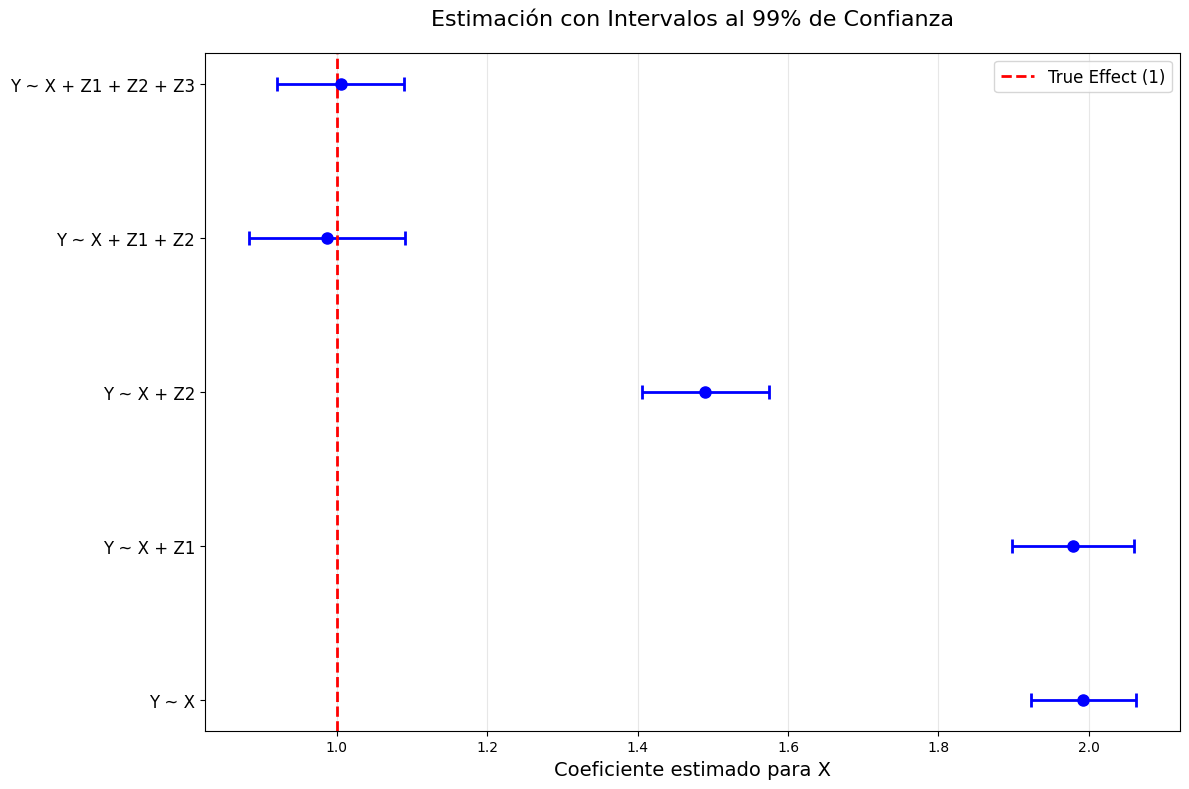

In [15]:
# Set up
np.random.seed(42)
sample = np.random.uniform(0, 1, (1_000_000, 1)) < 0.001
sample_indices = np.where(sample)[0]

# Simulación
pop_Z1 = np.random.normal(0, 1, (1_000_000, 1))
pop_Z3 = np.random.normal(0, 1, (1_000_000, 1))
pop_Z2 = pop_Z3 + np.random.normal(0, 1, (1_000_000, 1))
pop_X = pop_Z1 + pop_Z2 + np.random.normal(0, 1, (1_000_000, 1))
pop_Y = pop_X + pop_Z1 + pop_Z2 + pop_Z3 + np.random.normal(0, 1, (1_000_000, 1))

results = []

# 1. Y ~ X
model1 = sms.OLS(pop_Y[sample_indices], pop_X[sample_indices]).fit()
coef1 = model1.params[0]
ci1 = model1.conf_int(alpha=0.01)[0]
results.append(('Y ~ X', coef1, ci1[0], ci1[1]))

# 2. Y ~ X + Z1
model2 = sms.OLS(pop_Y[sample_indices], np.hstack((pop_X, pop_Z1))[sample_indices]).fit()
coef2 = model2.params[0]
ci2 = model2.conf_int(alpha=0.01)[0]
results.append(('Y ~ X + Z1', coef2, ci2[0], ci2[1]))

# 3. Y ~ X + Z2
model3 = sms.OLS(pop_Y[sample_indices], np.hstack((pop_X, pop_Z2))[sample_indices]).fit()
coef3 = model3.params[0]
ci3 = model3.conf_int(alpha=0.01)[0]
results.append(('Y ~ X + Z2', coef3, ci3[0], ci3[1]))

# 4. Y ~ X + Z1 + Z2
model4 = sms.OLS(pop_Y[sample_indices], np.hstack((pop_X, pop_Z1, pop_Z2))[sample_indices]).fit()
coef4 = model4.params[0]
ci4 = model4.conf_int(alpha=0.01)[0]
results.append(('Y ~ X + Z1 + Z2', coef4, ci4[0], ci4[1]))

# 5. Y ~ X + Z1 + Z2 + Z3
model5 = sms.OLS(pop_Y[sample_indices], np.hstack((pop_X, pop_Z1, pop_Z2, pop_Z3))[sample_indices]).fit()
coef5 = model5.params[0]
ci5 = model5.conf_int(alpha=0.01)[0]
results.append(('Y ~ X + Z1 + Z2 + Z3', coef5, ci5[0], ci5[1]))

# Gráfico
plt.figure(figsize=(12, 8))
models = [result[0] for result in results]
coefficients = [result[1] for result in results]
lower_bounds = [result[2] for result in results]
upper_bounds = [result[3] for result in results]

y_pos = np.arange(len(models))

plt.errorbar(coefficients, y_pos,
             xerr=[np.array(coefficients) - np.array(lower_bounds),
                   np.array(upper_bounds) - np.array(coefficients)],
             fmt='o', capsize=5, capthick=2, markersize=8, color='blue', linewidth=2)

plt.axvline(x=1, color='red', linestyle='--', linewidth=2, label='True Effect (1)')

plt.yticks(y_pos, models, fontsize=12)
plt.xlabel('Coeficiente estimado para X', fontsize=14)
plt.title('Estimación con Intervalos al 99% de Confianza', fontsize=16, pad=20)
plt.grid(True, alpha=0.3, axis='x')
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

Based on your results, answer the following



*   Which regressions seem to estimate the effect correctly?
*   Print a summary table for regressions (4) and (5). What can you comment on the point estimate and precesion?
*   Can you ignore some $Z$ $∈$ $Z_1$, $Z_2$, $Z_3$ and get a good estimate? Why do you think that is?

In [12]:
# Regresión 4: Y ~ X + Z₁ + Z₂
print("=== REGRESIÓN 4: Y ~ X + Z₁ + Z₂ ===")
print(model4.summary())

# Rgresión 5 : Y ~ X + Z₁ + Z₂ + Z₃
print("\n=== REGRESIÓN 5: Y ~ X + Z₁ + Z₂ + Z₃ ===")
print(model5.summary())

=== REGRESIÓN 4: Y ~ X + Z₁ + Z₂ ===
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              3733.
Date:                Sun, 05 Oct 2025   Prob (F-statistic):                        0.00
Time:                        02:25:46   Log-Likelihood:                         -1679.5
No. Observations:                1024   AIC:                                      3365.
Df Residuals:                    1021   BIC:                                      3380.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----

# **Análisis de Resultados**

### ***¿Qué regresiones estiman correctamente el efecto?***

Las regresiones **(4) Y ~ X + Z1 + Z2** y **(5) Y ~ X + Z1 + Z2 + Z3** estiman correctamente el efecto causal de X sobre Y (valor real = 1):
- **Regresión 4**: Coeficiente = 0.9868 (IC 95%: [0.908, 1.065])
- **Regresión 5**: Coeficiente = 1.0054 (IC 95%: [0.941, 1.070])
Las demás regresiones sobreestiman el efecto porque no controlan por los confounders necesarios (Z1 y Z2).

### ***Comparación de regresiones 4 y 5***

| Aspecto | Regresión 4 | Regresión 5 |
|---------|---------------|---------------|
| **Coef. de X** | 0.9868 | 1.0054 |
| **Error estándar** | 0.040 | 0.033 |
| **R² ajustado** | 0.916 | 0.944 |
| **Coef. de Z2** | 1.4714 | 0.9889 |

**Observación**

La regresión (5) es más precisa (menor error estándar) y todos sus coeficientes están cercanos a 1.0, reflejando correctamente la estructura causal del DAG. En la regresión (4), el coeficiente de Z2 está inflado (1.47 vs 0.99) porque captura parte del efecto omitido de Z3.

### ***¿Se puede ignorar alguna Z y obtener una buena estimación?***

Para estimar solo el efecto de X sobre Y sí, se puede ignorar Z3. La regresión (4) da una estimación prácticamente correcta (0.9868 ≈ 1.0).
Sin embargo, omitir Z3 causa sesgo de variable omitida en los coeficientes de control, especialmente en Z2, que absorbe parte del efecto de Z3.

**Conclusión**

Si solo interesa el efecto de X sobre Y con el mínimo de variables, se puede usar la regresión (4) con Z1 y Z2. Pero se quiere entender correctamente toda la estructura causal sin sesgos, la regresión (5) con todos los controles es superior por su mayor precisión y coeficientes correctos.